In [54]:
import pandas as pd
df = pd.read_csv("wine.csv")

In [152]:
df1=df.replace("good",1)
df2=df1.replace("bad",0)

In [307]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [436]:
xm = df["citric acid"]
xn= df["alcohol"]

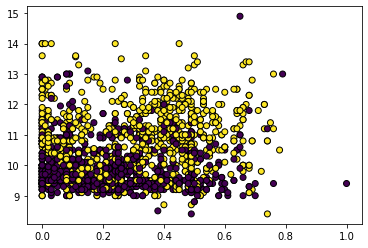

In [437]:
plt.scatter(xm,xn,c=y,edgecolor='black')

In [439]:
X

,citric acid,alcohol
0,0.00,9.4
1,0.00,9.8
2,0.04,9.8
3,0.56,9.8
4,0.00,9.4
...,...,...
1594,0.08,10.5
1595,0.10,11.2
1596,0.13,11.0
1597,0.12,10.2


In [440]:
y = df2.loc[0:1598,"quality"]

In [441]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [442]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=4000, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=4000, random_state=1)

In [443]:
ppn.coef_

array([[4.503     , 2.18666667]])

In [444]:
ppn.intercept_

array([-24.8])

In [445]:
y_pred = ppn.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 168
Accuracy: 0.65


In [446]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],
                    marker=markers[idx],label=cl,edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],X_test[:, 1],c='none', edgecolor='black',
                    alpha=1.0,linewidth=1,marker='o',s=100,label='test set')

C:\Users\qq138\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
C:\Users\qq138\AppData\Local\Temp\ipykernel_25280\1765318977.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],


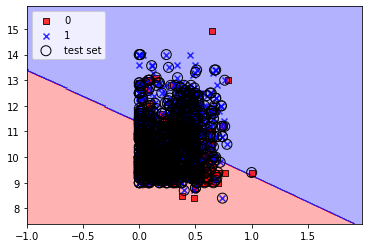

In [447]:
import numpy as np
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(
    X=X_combined, y=y_combined,classifier=ppn, test_idx=range(480,1599))
plt.legend(loc='upper left')
plt.show()